In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage
import cv2 as cv
import pandas as pd
import Analytics

In [2]:
frames = []
for i in range(241):
    x = np.load(f"/mnt/c/Users/hfriz/OneDrive/Documents/AcademicsResearchProjects/StanfordGenetics-Neutraphils/CH2Frames/frame{i}.npy")
    frames.append(x)

In [4]:
def cell_intensity(contour): # THIS COMPUTES MOMENT AREA, ie. TOTAL INTENSITY OF THE CELL, not area of the contour
    M = skimage.measure.moments_coords(contour)
    return M[0,0]

def cell_centroid(contour):
    M = skimage.measure.moments_coords(contour)
    centroid = (M[1, 0] / M[0, 0], M[0, 1] / M[0, 0])
    return centroid

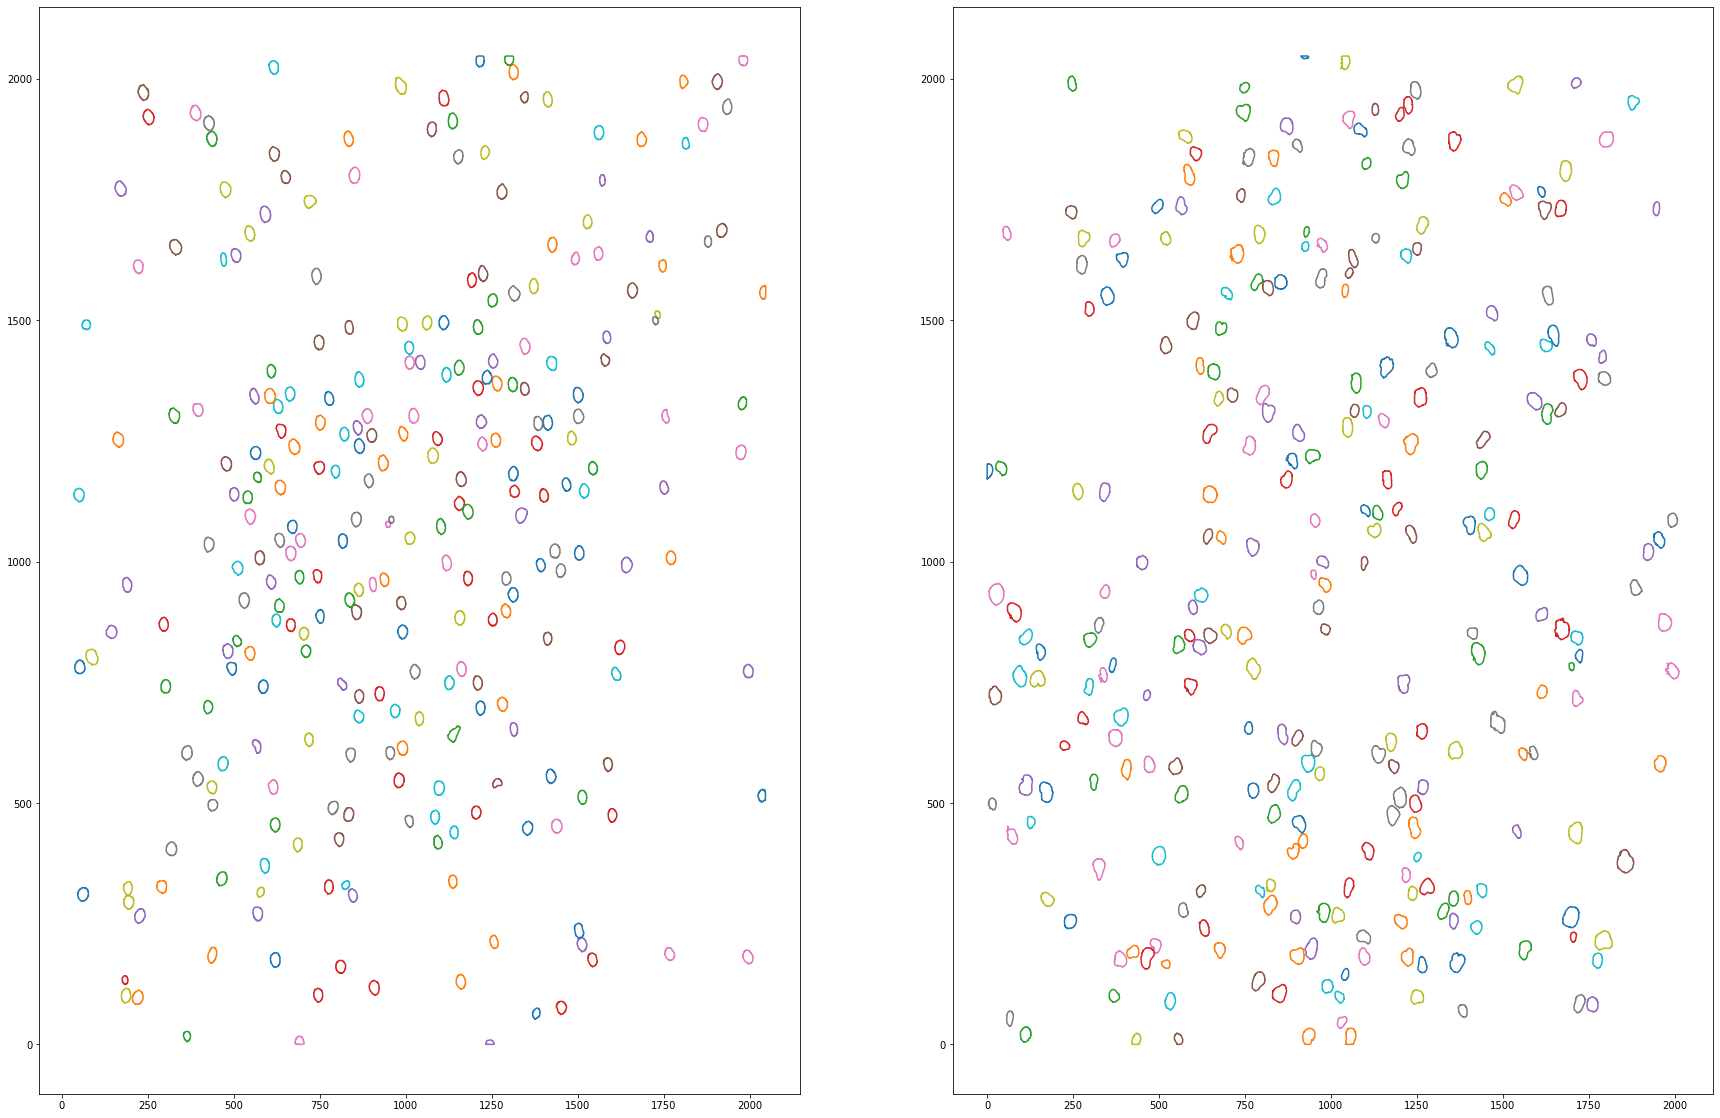

In [29]:
f, (ax, bx) = plt.subplots(1,2, figsize=(30,20))
for i in range(276):
    ax.plot(frames[0][i,:,0],frames[0][i,:,1])
    bx.plot(frames[240][i,:,0],frames[240][i,:,1])
    

In [32]:
print('Number of cells in frame 0:\n', len(frames[0]))
print('Number of cells in frame 240:\n', len(frames[240]))

Number of cells in frame 0:
 646
Number of cells in frame 240:
 1057


In [6]:
frame_list = list()
for i in range(len(frames)):
    frame_list.append({})

In [7]:
for i in range(len(frames)):
    frame_list[i]['cell'] = []
    frame_list[i]['area'] = []
    frame_list[i]['centroid'] = [] 
    frame_list[i]['centroid X'] = []
    frame_list[i]['centroid Y'] = []
    for j in range(frames[i].shape[0]):
        frame_list[i]['cell'].append(j)
        
        a = cv.contourArea(frames[i][j])
        c = cell_centroid(frames[i][j])
        
        frame_list[i]['area'].append(a)
        frame_list[i]['centroid'].append(c)
        frame_list[i]['centroid X'].append(c[0])
        frame_list[i]['centroid Y'].append(c[1])

In [8]:
df0 = pd.DataFrame(frame_list[0], index=list(np.full((1,len(frame_list[0]['cell'])), 0)))

In [9]:
df0

,cell,area,centroid,centroid X,centroid Y
0,0,440.919265,"(1216.3932, 2036.7736)",1216.393188,2036.773560
0,1,615.453171,"(1262.2424, 1251.5045)",1262.242432,1251.504517
0,2,485.882486,"(1979.225, 1327.6854)",1979.224976,1327.685425
0,3,608.118827,"(924.6294, 726.18805)",924.629395,726.188049
0,4,175.034616,"(1245.2369, 3.5135105)",1245.236938,3.513510
...,...,...,...,...,...
0,641,1026.875560,"(1318.8904, 26.280779)",1318.890381,26.280779
0,642,486.090581,"(1053.932, 173.07576)",1053.932007,173.075760
0,643,542.507752,"(42.21281, 203.08023)",42.212811,203.080231
0,644,423.717552,"(751.9889, 139.75333)",751.988892,139.753326


In [11]:
frame_list[0]['centroid X'][0]

1216.3932

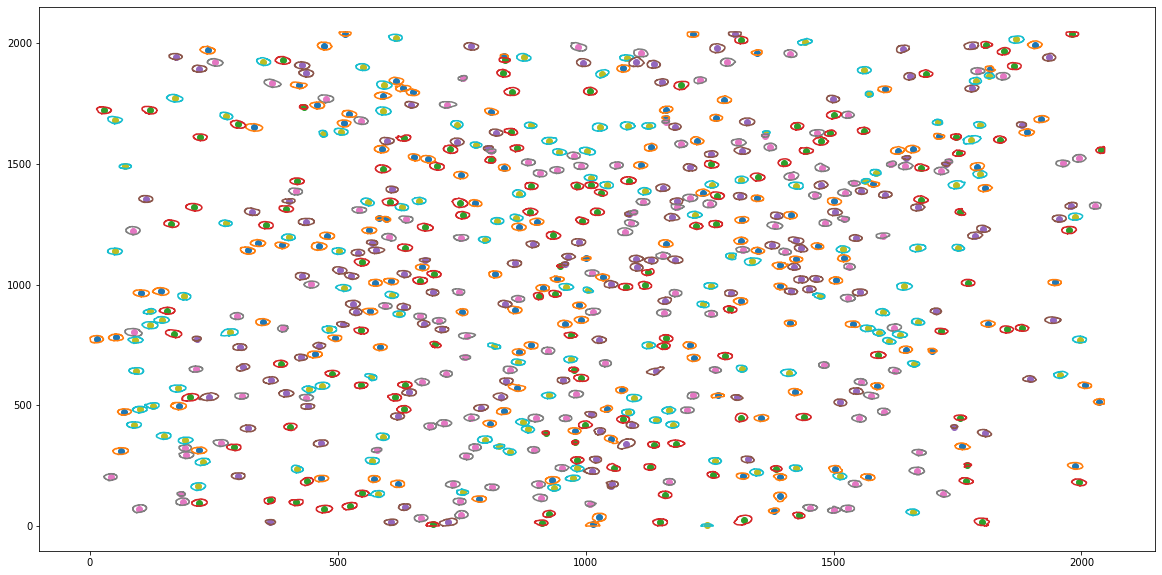

In [12]:
g, bx = plt.subplots(1,figsize=(20,10))
for i in range(frames[0].shape[0]):
    bx.plot(frame_list[0]['centroid'][i][0],frame_list[0]['centroid'][i][1],'o')
    bx.plot(frames[0][i,:,0],frames[0][i,:,1])


In [13]:
## Compile the entire video's data frame and export to CSV

for i in range(len(frame_list)):
    if i == 0:
        df = pd.DataFrame(frame_list[i], index=list(np.full((1,len(frame_list[i]['cell'])), i)))
    else:
        dfi = pd.DataFrame(frame_list[i], index=list(np.full((1,len(frame_list[i]['cell'])), i)))
        df = pd.concat([df,dfi])

In [19]:
df

,cell,area,centroid,centroid X,centroid Y
Frame,,,,,
0,0,440.919265,"(1216.3932, 2036.7736)",1216.393188,2036.773560
0,1,615.453171,"(1262.2424, 1251.5045)",1262.242432,1251.504517
0,2,485.882486,"(1979.225, 1327.6854)",1979.224976,1327.685425
0,3,608.118827,"(924.6294, 726.18805)",924.629395,726.188049
0,4,175.034616,"(1245.2369, 3.5135105)",1245.236938,3.513510
...,...,...,...,...,...
240,1052,1664.177803,"(1220.0168, 1585.9319)",1220.016846,1585.931885
240,1053,1848.696195,"(335.19278, 604.8198)",335.192780,604.819824
240,1054,715.592445,"(550.92975, 1482.9679)",550.929749,1482.967896


In [20]:
df.to_csv('/mnt/c/Users/hfriz/OneDrive/Documents/AcademicsResearchProjects/StanfordGenetics-Neutraphils/CH2Data')

In [18]:
df.index.names = ['Frame']

## HC Data.
Now let's make a data frame of healthy control data.

In [2]:
hc2_frames = Analytics.load_frames('/mnt/c/Users/hfriz/OneDrive/Documents/AcademicsResearchProjects/StanfordGenetics-Neutraphils/HC/CH2',121)
hc_ch2_df = Analytics.create_df(hc2_frames)

In [4]:
hc_ch2_df.to_csv('/mnt/c/Users/hfriz/OneDrive/Documents/AcademicsResearchProjects/StanfordGenetics-Neutraphils/HC_CH2_Data')

# Now we will process Ch3 and Ch4 data for both ME and HC cases. 
### Importantly, we want to try and track differences in centroid and area between channel 3 and channel 4 to identify changes in cell state and morphology.

In [6]:
for i in range(3,5):
    hc_frames = Analytics.load_frames(f'/mnt/c/Users/hfriz/OneDrive/Documents/AcademicsResearchProjects/StanfordGenetics-Neutraphils/HC/CH{i}',121)
    hc_df = Analytics.create_df(hc_frames)
    hc_df.to_csv(f'/mnt/c/Users/hfriz/OneDrive/Documents/AcademicsResearchProjects/StanfordGenetics-Neutraphils/HC_CH{i}_Data.csv')
    me_frames = Analytics.load_frames(f'/mnt/c/Users/hfriz/OneDrive/Documents/AcademicsResearchProjects/StanfordGenetics-Neutraphils/ME/CH{i}',241)
    me_df = Analytics.create_df(me_frames)
    me_df.to_csv(f'/mnt/c/Users/hfriz/OneDrive/Documents/AcademicsResearchProjects/StanfordGenetics-Neutraphils/ME_CH{i}_Data.csv')

# Now on the new 40X data we process counts.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage
import cv2 as cv
import pandas as pd
import Analytics

In [2]:
# First the DIC contours:
dic_frames = Analytics.load_frames(f'/mnt/c/Users/hfriz/OneDrive/Documents/AcademicsResearchProjects/StanfordGenetics-Neutraphils/40XData9-26/DIC',121)
dic_df = Analytics.cell_stats(dic_frames)

In [19]:
dic_df

,frame,cell,area,centroid,xcoord,ycoord
0,0,0,1981.343965,"(1979.8295, 1293.2507)",1979.829468,1293.250732
0,0,1,2058.845734,"(904.86414, 728.88666)",904.864136,728.886658
0,0,2,2551.149527,"(1462.0245, 34.006386)",1462.024536,34.006386
0,0,3,1727.285623,"(1152.9823, 62.666466)",1152.982300,62.666466
0,0,4,2206.445397,"(1239.1356, 1887.3387)",1239.135620,1887.338745
...,...,...,...,...,...,...
120,120,334,1492.916258,"(1226.403, 951.838)",1226.402954,951.838013
120,120,335,4314.949704,"(269.84348, 1097.6534)",269.843475,1097.653442
120,120,336,2850.774615,"(141.26767, 448.43094)",141.267670,448.430939
120,120,337,2099.798891,"(544.7608, 1254.1901)",544.760803,1254.190063


In [4]:
dic_stats = Analytics.sample_ch_stats(dic_df, title = 'DIC', frame_counts=True)

In [9]:
dic_stats.to_csv(f'/mnt/c/Users/hfriz/OneDrive/Documents/AcademicsResearchProjects/StanfordGenetics-Neutraphils/40XData9-26/dic_contour_counts.csv')

In [7]:
# Now the FITC data
fitc_frames = Analytics.load_frames(f'/mnt/c/Users/hfriz/OneDrive/Documents/AcademicsResearchProjects/StanfordGenetics-Neutraphils/40XData9-26/FITC',121)
fitc_df = Analytics.cell_stats(fitc_frames)
fitc_stats = Analytics.sample_ch_stats(fitc_df, title = "FITC", frame_counts = True)

In [11]:
fitc_stats.to_csv(f'/mnt/c/Users/hfriz/OneDrive/Documents/AcademicsResearchProjects/StanfordGenetics-Neutraphils/40XData9-26/fitc_contour_counts.csv')

In [14]:
df = pd.concat([dic_stats,fitc_stats], axis=1)

In [16]:
df.to_csv(f'/mnt/c/Users/hfriz/OneDrive/Documents/AcademicsResearchProjects/StanfordGenetics-Neutraphils/40XData9-26/40X_contour_counts.csv')

In [20]:
dic_stats

,DIC
frame 0 Count,272.000000
frame 1 Count,272.000000
frame 2 Count,283.000000
frame 3 Count,284.000000
frame 4 Count,296.000000
...,...
Std Count,18.777973
Avg Count ROC,0.558333
Min Gini Index,0.247003
Max Gini Index,0.348216
